In [2]:
## Import Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
## Turtle Soup Strategy 
def detect_turtle_soup(stock_symbol, lookback_period=40):
    # Download historical data from Yahoo Finance
    stock_data = yf.download(stock_symbol, start="2024-02-01", end="2024-03-29")
    
    # Calculate rolling highs and lows
    stock_data['Rolling High'] = stock_data['High'].shift(1).rolling(window=20).max()
    stock_data['Rolling Low'] = stock_data['Low'].shift(1).rolling(window=20).min()

    # Detect potential turtle soup patterns
    stock_data['Potential Turtle Soup'] = (stock_data['High'] > stock_data['Rolling High']) | (stock_data['Low'] < stock_data['Rolling Low'])
    
    # Filter out rows where potential turtle soup is detected
    turtle_soup_patterns = stock_data[stock_data['Potential Turtle Soup']]
    
    return stock_data, turtle_soup_patterns


In [4]:
# List of stocks to analyze
stocks = ['RELIANCE.NS', 'TCS.NS', 'SBIN.NS','TORNTPOWER.NS']

In [5]:
# Example usage
stock_symbol = 'BAJFINANCE.NS'
turtle_soup_data = detect_turtle_soup(stock_symbol)
print(turtle_soup_data)

[*********************100%***********************]  1 of 1 completed
(                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-02-01  6865.899902  6879.950195  6733.000000  6743.299805  6743.299805   
2024-02-02  6755.000000  6910.000000  6753.000000  6848.299805  6848.299805   
2024-02-05  6894.000000  6895.000000  6600.000000  6608.200195  6608.200195   
2024-02-06  6648.000000  6699.000000  6535.000000  6598.149902  6598.149902   
2024-02-07  6641.000000  6737.600098  6625.250000  6709.200195  6709.200195   
2024-02-08  6731.850098  6737.500000  6536.700195  6575.649902  6575.649902   
2024-02-09  6580.000000  6677.700195  6572.000000  6654.500000  6654.500000   
2024-02-12  6669.450195  6671.850098  6551.500000  6569.149902  6569.149902   
2024-02-13  6600.000000  6639.000000  6553.100098  6603.649902  6603.649902   
2024-02-14  6563.850098  6656.000000  6550.000000  6646.50000

In [6]:
# Detect turtle soup patterns for each stock
for stock_symbol in stocks:
    print("Turtle Soup Patterns for", stock_symbol)
    turtle_soup_patterns = detect_turtle_soup(stock_symbol)
    print(turtle_soup_patterns)
    print("\n")

Turtle Soup Patterns for RELIANCE.NS
[*********************100%***********************]  1 of 1 completed
(                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2024-02-01  2870.000000  2886.699951  2836.100098  2853.300049  2853.300049   
2024-02-02  2866.350098  2949.800049  2866.350098  2915.399902  2915.399902   
2024-02-05  2921.500000  2941.000000  2863.050049  2878.050049  2878.050049   
2024-02-06  2883.699951  2883.699951  2839.649902  2855.600098  2855.600098   
2024-02-07  2871.850098  2899.000000  2858.500000  2884.300049  2884.300049   
2024-02-08  2900.000000  2918.949951  2855.050049  2900.250000  2900.250000   
2024-02-09  2908.000000  2943.949951  2901.899902  2921.500000  2921.500000   
2024-02-12  2921.500000  2922.000000  2884.699951  2904.699951  2904.699951   
2024-02-13  2911.000000  2958.000000  2908.000000  2930.199951  2930.199951   
2024-02-14  2915.000000 

In [63]:
# Set display options to show maximum rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

Turtle Soup Patterns for RELIANCE.NS
[*********************100%***********************]  1 of 1 completed


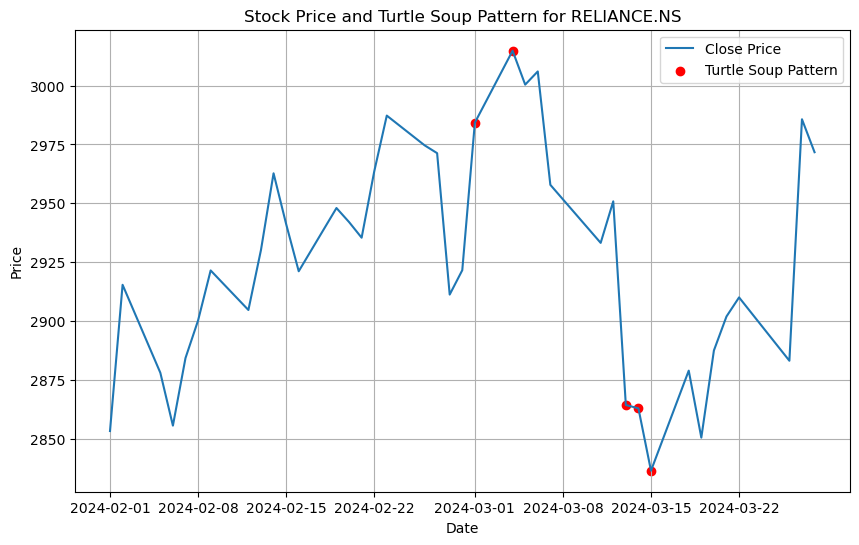

Turtle Soup Patterns for TCS.NS
[*********************100%***********************]  1 of 1 completed


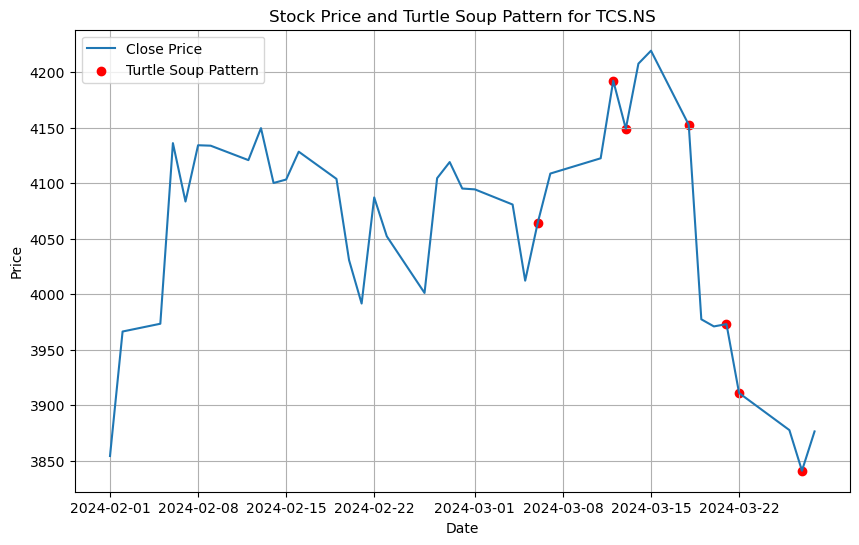

Turtle Soup Patterns for SBIN.NS
[*********************100%***********************]  1 of 1 completed


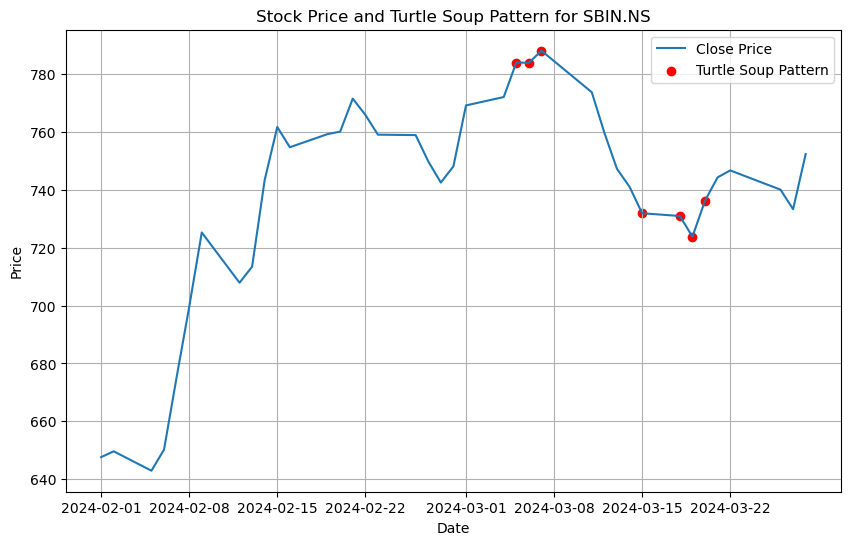

Turtle Soup Patterns for TORNTPOWER.NS
[*********************100%***********************]  1 of 1 completed


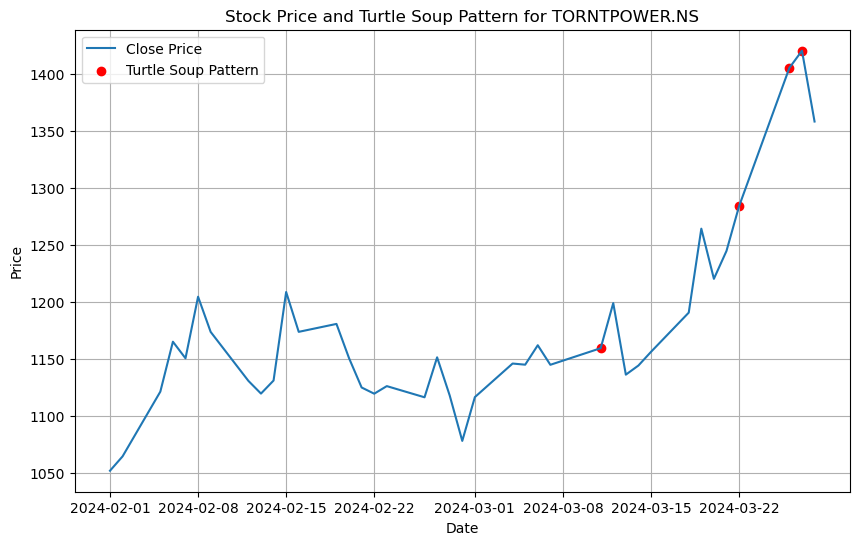

In [7]:
# Detect turtle soup patterns for each stock and plot
for stock_symbol in stocks:
    print("Turtle Soup Patterns for", stock_symbol)
    stock_data, turtle_soup_patterns = detect_turtle_soup(stock_symbol)
    
    # Plot stock prices
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    
    # Mark Turtle Soup pattern occurrences
    if not turtle_soup_patterns.empty:
        plt.scatter(turtle_soup_patterns.index, turtle_soup_patterns['Close'], color='red', label='Turtle Soup Pattern')
    
    plt.title(f'Stock Price and Turtle Soup Pattern for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

In [8]:
def backtest_turtle_soup(stock_data, initial_capital=10000):
    capital = initial_capital
    shares = 0
    positions = pd.DataFrame(index=stock_data.index, columns=['Position'])
    
    for index, row in stock_data.iterrows():
        if row['Potential Turtle Soup']:
            if capital > 0:  # Buy
                shares_to_buy = capital / row['Close']
                shares += shares_to_buy
                capital = 0
                positions.loc[index] = 1  # Long position
        else:
            if shares > 0:  # Sell
                capital += shares * row['Close']
                shares = 0
                positions.loc[index] = -1  # Short position
    
    # Sell remaining shares at the end of the period
    if shares > 0:
        capital += shares * stock_data.iloc[-1]['Close']
    
    # Calculate returns
    returns = (capital - initial_capital) / initial_capital * 100
    
    return capital, returns, positions

Backtesting Turtle Soup Strategy for RELIANCE.NS
[*********************100%***********************]  1 of 1 completed
Ending Capital: 10105.363874052002
Returns: 1.0536387405200185 %


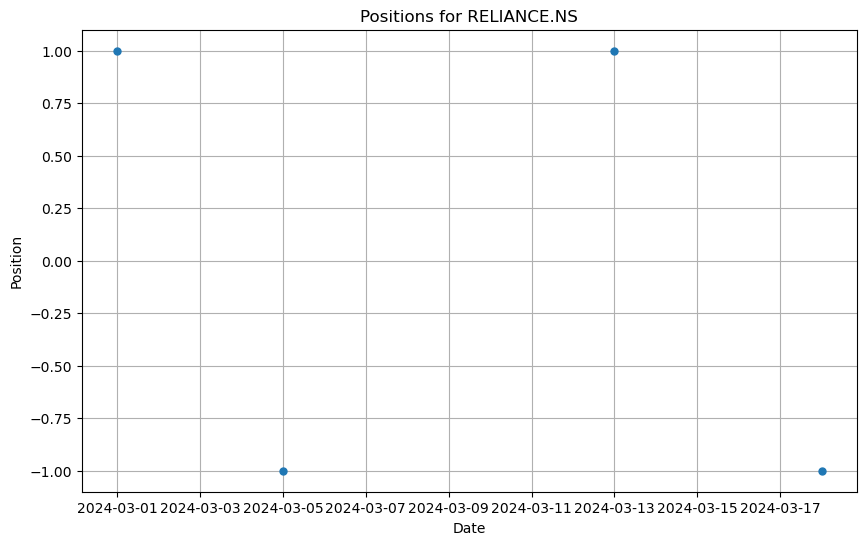

Backtesting Turtle Soup Strategy for TCS.NS
[*********************100%***********************]  1 of 1 completed
Ending Capital: 9571.879377525735
Returns: -4.281206224742655 %


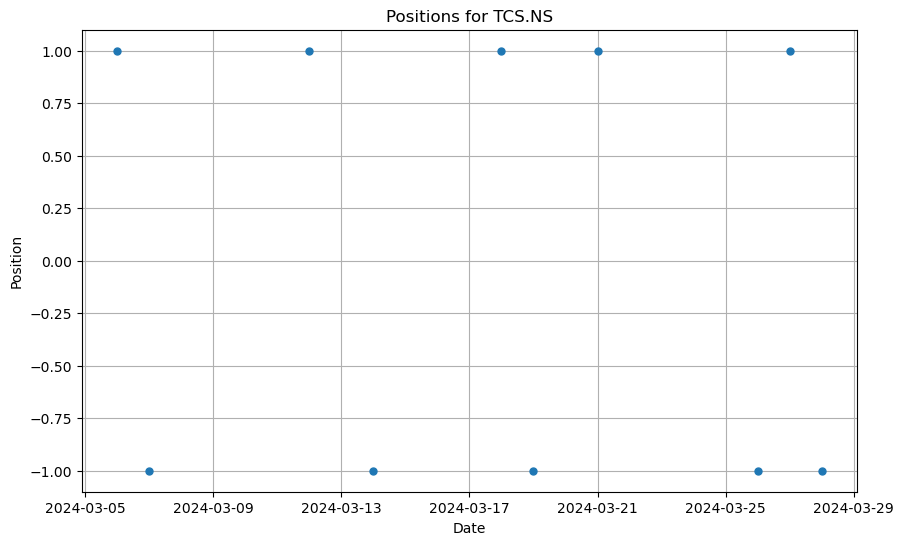

Backtesting Turtle Soup Strategy for SBIN.NS
[*********************100%***********************]  1 of 1 completed
Ending Capital: 10036.458258698149
Returns: 0.36458258698148716 %


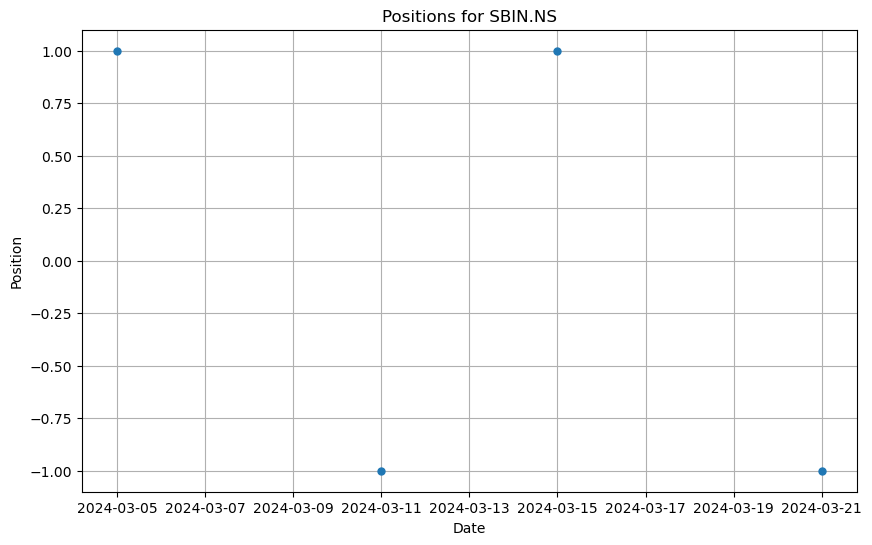

Backtesting Turtle Soup Strategy for TORNTPOWER.NS
[*********************100%***********************]  1 of 1 completed
Ending Capital: 10939.76440665307
Returns: 9.3976440665307 %


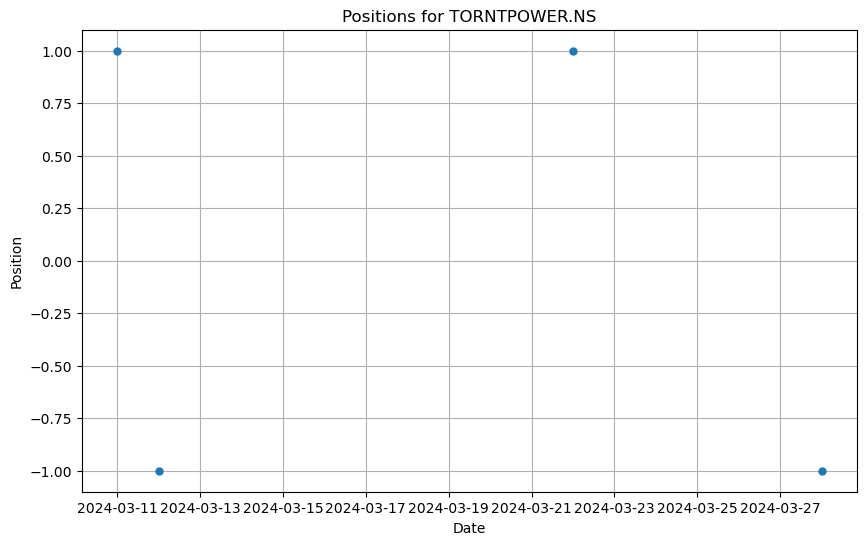

In [9]:

# Backtest Turtle Soup strategy for each stock
for stock_symbol in stocks:
    print("Backtesting Turtle Soup Strategy for", stock_symbol)
    stock_data, _ = detect_turtle_soup(stock_symbol)
    capital, returns, positions = backtest_turtle_soup(stock_data)
    
    print("Ending Capital:", capital)
    print("Returns:", returns, "%")
    
    # Plot positions
    plt.figure(figsize=(10, 6))
    plt.plot(positions.index, positions['Position'], marker='o', linestyle='', markersize=5)
    plt.title(f'Positions for {stock_symbol}')
    plt.xlabel('Date')
    plt.ylabel('Position')
    plt.grid(True)
    plt.show()